


# PROJECT: ANALYZING NETFLIX DATA



# 1. Loading the data into a dictionary

Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

First we'll need to create a DataFrame from scratch. 

In [2]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years' :years, 'durations':durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


# 2. Creating a DataFrame from a dictionary
Perfect! We now have our friend's data stored in a nice Python object. We can already perform several operations on a dictionary to manipulate its contents (such as updating or adding to it). But a more useful structure might be a pandas DataFrame, a tabular data structure containing labeled axes and rows. Luckily, DataFrames can be created very easily from the dictionary created in the previous step!

To convert our dictionary movie_dict to a pandas DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.

In [3]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


# 3. A visual inspection of our data
We now have a pandas DataFrame.

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.

<function matplotlib.pyplot.show(close=None, block=None)>

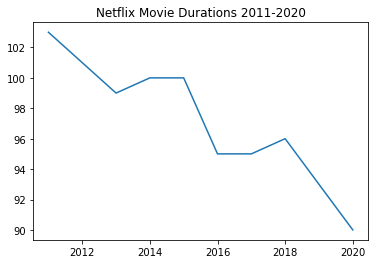

In [9]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt

fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'], durations_df['durations'])

# Create a title
plt.title('Netflix Movie Durations 2011-2020')

# Show the plot
plt.show

# 4. Loading the rest of the data from a CSV

I now have access to the CSV file, I will inspect it by printing only the first five rows.

In [6]:
import pandas as pd

# Read in the CSV as a DataFrame
netflix_df = pd.read_csv('netflix_data.csv')

# Print the first five rows of the DataFrame
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

# 5. Filtering for movies!

Now we have our data and we can start looking at movie lengths.

I create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.

In [7]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset[0:5])

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


# 6. Creating a scatter plot

Here we are  working with  with individual movies. A line plot is not a good choice for our data, I ran a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.

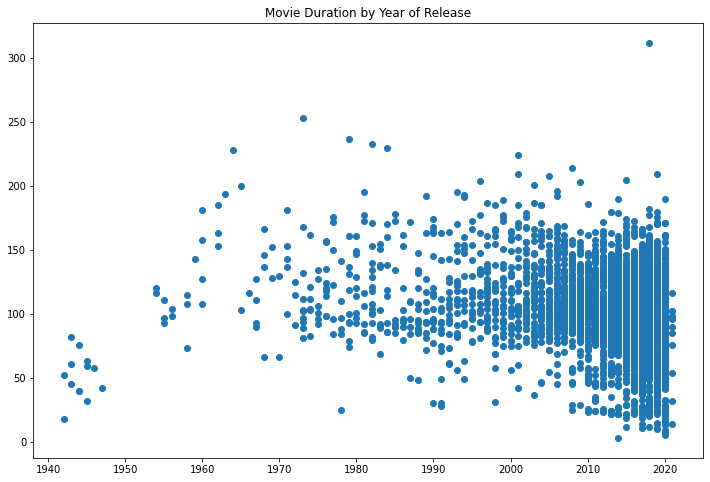

In [8]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

# 7. Digging deeper
This is much more informative than the simple plot we created above. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

In [10]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
print(short_movies[0:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

# 8. Marking non-feature films
Many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the genre column. We can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!

In [15]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre']== 'Documentaries':
        colors.append('blue')
    elif row['genre']== 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


# 9. Plotting with color!

We now have a colors list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

This time, we'll also use some additional axis labels and a new theme with plt.style.use().

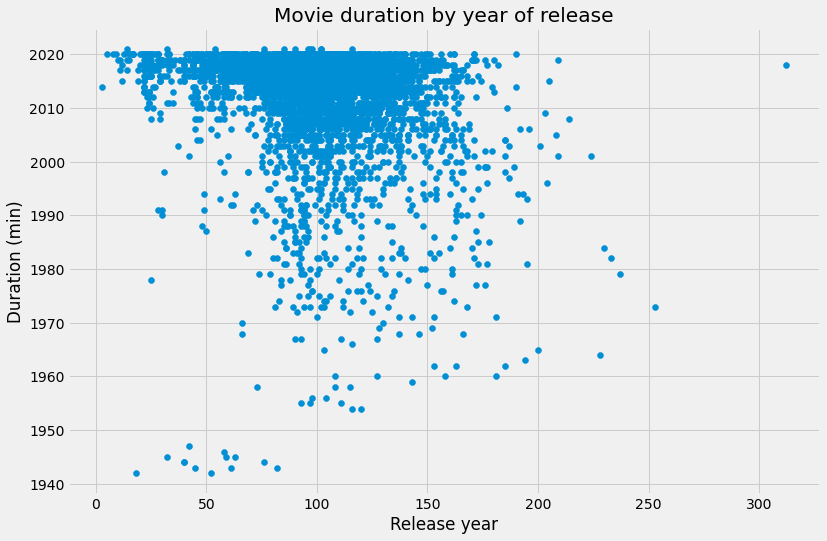

In [12]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['duration'], netflix_movies_col_subset['release_year'])

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

# 10. Conclusion

In conclusion, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot.  But we can't know for certain until we perform additional analyses.